In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # added because I would like all the rows to be displayed by head

df = pd.read_csv('./survey_results_public.csv')
df.head(20)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [2]:
df2 = pd.read_csv('./survey_results_schema.csv')
df2.head(61)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [3]:
list(df2[df2.Column == 'Country']['QuestionText'])

['Where do you live?']

In [4]:
list(df2[df2.Column == 'Gender']['QuestionText'])

['Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.']

In [5]:
df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [6]:
list(df2[df2.Column == 'MainBranch']['QuestionText'])

['Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."']

In [7]:
df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

Next, let's create a new dataframe df_new which would contain the survey results only from Germany, including people that define themselves as Man or Woman and declare either that are "I am a developer by profession" or "I am not primarily a developer, but I write code sometimes as part of my work"

In [8]:
df_new = df[(df['Country']=='Germany') & ((df['Gender']=='Man') | (df['Gender']=='Woman')) & ((df['MainBranch']=='I am a developer by profession')|
                                                                                              (df['MainBranch']=='I am not primarily a developer, but I write code sometimes as part of my work'))] 

In [9]:
df_new.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,NaN,NaN,"Designer;Developer, front-end;Developer, mobile","Secondary school (e.g. American high school, G...",Employed full-time,White or of European descent,Man,Diversity of the company or organization;Langu...,Slightly satisfied,I am not interested in new job opportunities,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,NaN,NaN,Github;Slack,Confluence;Github;Slack;Trello,Not sure,NaN,Fairly important,NaN,NaN,Once a year,No,No,No,Never,Ask developers I know/work with;Read ratings o...,Amused,Stack Overflow (public Q&A for anyone who code...,Play games;Visit Stack Overflow;Watch help / t...,Windows,NaN,Android,Android;Docker;WordPress,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,A few times per week,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
22,23,I am a developer by profession,Yes,27.0,14,NaN,NaN,NaN,Germany,European Euro,EUR,NaN,NaN,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Very satisfied,I am not interested in new job opportunities,C#;C++,Bash/Shell/PowerShell;C#;C++,.NET Core,.NET,Confluence;Jira;Github,Confluence;Jira;Github,No,Neutral,Fairly important,Curious about other opportunities;Better compe...,Company reviews from third party sites (e.g. G...,Every few months,No,Onboarding? What onboarding?,No,Rarely: 1-2 days per year or less,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,Windows,100 to 499 employees,Arduino;Linux;Raspberry Pi,Arduino;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Daily or

Let us check the length of the new dataframe df_new:

In [10]:
len(df_new)

2763

the number and the percentage of Women in the new dataframe:

In [11]:
len(df_new[df_new['Gender']=='Woman'])

158

In [12]:
percentage_women= len(df_new[df_new['Gender']=='Woman'])/len(df_new)*100
print(round(percentage_women,1))

5.7


While the number and the percentage of Men in the new dataframe are respectively

In [13]:
len(df_new[df_new['Gender']=='Man'])

2605

In [14]:
percentage_men= len(df_new[df_new['Gender']=='Man'])/len(df_new)*100
print(round(percentage_men,1))

94.3


In [15]:
list(df2[df2.Column == 'EdLevel']['QuestionText'])

['Which of the following best describes the highest level of formal education that you’ve completed?']

In [16]:
list(df2[df2.Column == 'DevType']['QuestionText'])

['Which of the following describe you? Please select all that apply.']

In [17]:
list(df2[df2.Column == 'UndergradMajor']['QuestionText'])

['What was your primary field of study?']

In [18]:
def create_percentage(df, column_name, column_rename, melt):
    '''
    INPUT
    df - pandas dataframe
    column_name - name of column fow which the percentage of entries will be found
    column_rename - how to rename the index of the new dataframe
    melt - when True created a dataframe with a column Gender that could be Man or Woman
           when False creates two columns one for Man and another one for Woman
    
    It creates a dataframe that contains the percentage of entries that correspond to a 'column_name' column and rows that
    correspond to Man or Woman. 
    '''
    study_df_women = (df[df['Gender']=='Woman'][column_name].value_counts()/len(df[df['Gender']=='Woman'][column_name])*100).reset_index()
    study_df_men = (df[df['Gender']=='Man'][column_name].value_counts()/len(df[df['Gender']=='Man'][column_name])*100).reset_index()
    study_df_women.rename(columns={'index': column_rename, column_name: 'Women'}, inplace=True)
    study_df_men.rename(columns={'index': column_rename, column_name: 'Men'}, inplace=True)
    study_df = pd.merge(study_df_women, study_df_men, on=column_rename )

    if melt == True:
        df_new = pd.melt(study_df, id_vars=[column_rename], value_vars=['Men','Women'], var_name='Gender')
    else:
        df_new = study_df

    return df_new

In [19]:
 def create_frequency(df, column_name, column_rename):
    '''
    INPUT
    df - pandas dataframe
    column_name - name of column fow which the percentage of entries will be found
    column_rename - how to rename the index of the new dataframe

    OUTPUT
    table - contingency matrix
    '''
    study_df_women = df[df['Gender']=='Woman'][column_name].value_counts().reset_index()
    study_df_men = df[df['Gender']=='Man'][column_name].value_counts().reset_index()
    study_df_women.rename(columns={'index': column_rename, column_name: 'Women'}, inplace=True)
    study_df_men.rename(columns={'index': column_rename, column_name: 'Men'}, inplace=True)
    study_df = pd.merge(study_df_women, study_df_men, on=column_rename ).T
    study_df.reset_index
    
    return study_df

In [20]:
def show_values_on_bars(axs, h_v="v", space=0.3):
    '''
    INPUT
    axs - input boxplot
    h_v - vertical(v) or horizontal(h)
    space - how much space to leave after the bar
    
    
    Adds values of entries in boxplot
    '''
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = round(p.get_height(),1)
                ax.text(_x, _y, value, ha="center", fontsize = 18) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space) / 4
                a_number = round(p.get_width(),1)
                value = "{}%".format(a_number)
                if a_number > 0:
                    ax.text(_x, _y, value, ha="left", fontsize = 18)
                else:
                    ax.text(_x + 5 * float(space), _y, value, ha="center", fontsize = 18)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [21]:
def plot(y_input, df):
    '''
    INPUT 
    y_input - input of y axis
    df - pandas dataframe
    
    
    Creates a boxplot with entries for Men and Women for a given input categorical variable y. 
    '''
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()

    sns.set_color_codes("pastel")
    sns_t = sns.barplot(x="value", y=y_input, hue="Gender", data=df)
 
    plt.ylabel("")
    plt.xlabel("")

    ax.legend(loc='center right', frameon=False, prop={'size':20})

    show_values_on_bars(sns_t, "h", 0.3)
    sns.despine(left=True, bottom=True, right=True)
    sns_t.set(xticklabels=[])  
    ylabels = sns_t.get_yticklabels()
    sns_t.set_yticklabels(ylabels, fontsize=18)

    plt.show()

In [22]:
df_field_of_study = create_percentage(df_new, 'UndergradMajor', 'Field of study', True)

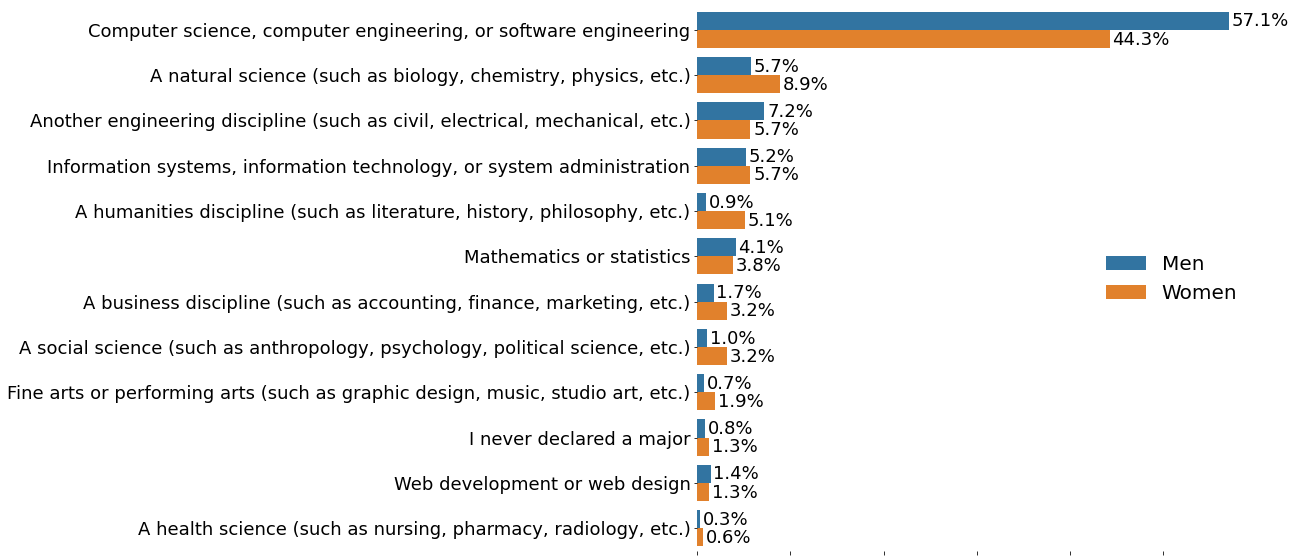

In [23]:
plot("Field of study", df_field_of_study)

We see that although for both Women and Men the most popular degree to work in a developer's role is "Comuter science, computer engineering or software engineering" the percentage of Men with such a degree is much higher than the corresponding one for Women. On the other hand a higher percentage of Women with a degree in "a natural science" work as developers. Quiet striking is also the fact that a higher percentage of Women with a degree in "a humanities discipline" work as developers, maybe related to the fact that overall more Women than Men have such a degree. As the size of our sample that includes Men is much bigger than the corresponding one for Women, it might be that these percentages are misleading, so we will perform a t-test to comclude if there is significance difference between the Women and Men distributions.

In [24]:
table= create_frequency(df_new, 'UndergradMajor', 'Field of Study')
table.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Field of Study,"Computer science, computer engineering, or sof...","A natural science (such as biology, chemistry,...","Another engineering discipline (such as civil,...","Information systems, information technology, o...","A humanities discipline (such as literature, h...",Mathematics or statistics,"A business discipline (such as accounting, fin...","A social science (such as anthropology, psycho...",Fine arts or performing arts (such as graphic ...,I never declared a major,Web development or web design,"A health science (such as nursing, pharmacy, r..."
Women,70,14,9,9,8,6,5,5,3,2,2,1
Men,1488,149,187,136,23,107,45,27,18,20,37,8


In [25]:
table_field_of_study=[[70, 14, 8],[1488, 149, 23]]

In [26]:
alpha = 0.05
pvalue = chi2_contingency(table_field_of_study)[1]
if pvalue <= alpha:
    print("Dependent (reject HO)")
else:
    print("Independent (HO Holds)")
print(pvalue)

Dependent (reject HO)
1.2587759734361507e-07


The null hypothesis was that there is no significant statistical difference between the distribution of Men and Women
who have studied "Computer Science,..","a natural science..", or a "humanities discipline..". The rejection of the null hypothesis suggests that we can safely conclude that more Men that Women with a degree in "Computer science" work as developers and on the other hand more Women with a "natural science" or a "humanities discipline" do.

Next we are going to check the education level of Women and Men developers in Germany, according to how they have answered the question 'Which of the following best describes the highest level of formal education that you’ve completed?'.

In [27]:
df_education_level = create_percentage(df_new, 'EdLevel', 'Education Level', True)

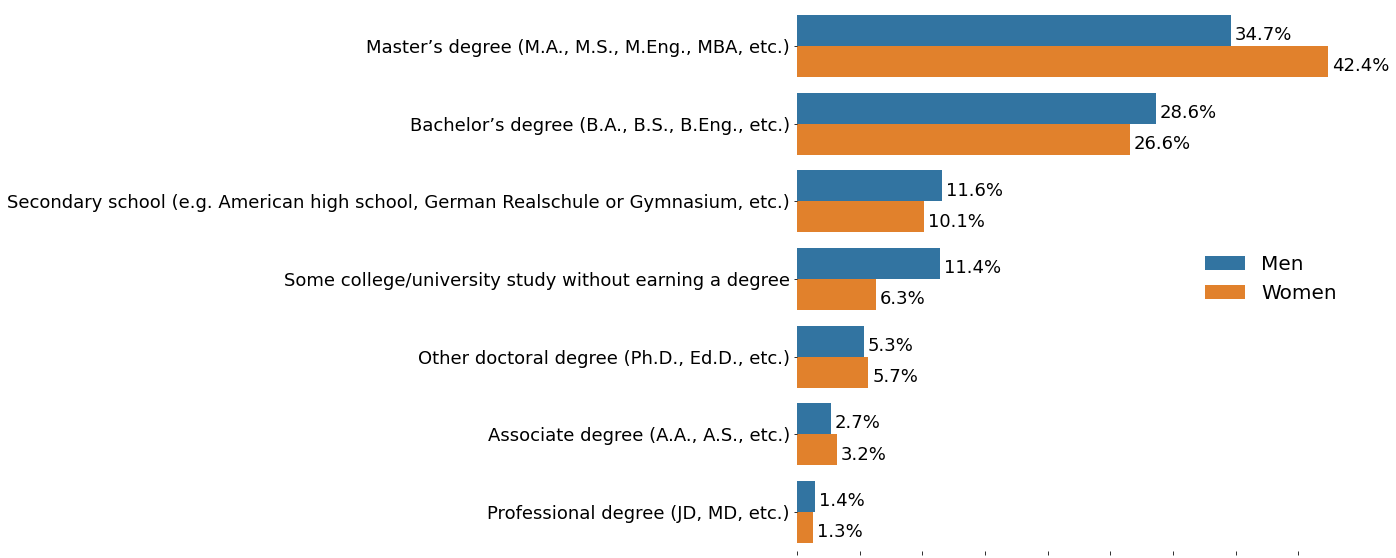

In [29]:
plot("Education Level", df_education_level)

In [30]:
table = create_frequency(df_new, 'EdLevel', 'Education Level')
table.head()

,0,1,2,3,4,5,6
Education Level,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Secondary school (e.g. American high school, G...",Some college/university study without earning ...,"Other doctoral degree (Ph.D., Ed.D., etc.)","Associate degree (A.A., A.S., etc.)","Professional degree (JD, MD, etc.)"
Women,67,42,16,10,9,5,2
Men,903,746,302,297,139,71,37


We would like to check if there is a significant difference between the Women and Men developers who own a Master or a PhD degree with respect to the ones with highest education level the Bachelor, Secondary school, some college/university without earning a degree or associate degree. The null hypothesis is that the two set of data (that correspond to Women and Men) are not significantly different from each other. 

In [26]:
67+9

109

In [27]:
903+139

1042

In [30]:
42+16+10+5

73

In [31]:
746+302+297+71

1416

In [32]:
table_ed_level = [[109, 73],[1042, 1416]]

In [33]:
alpha = 0.05
pvalue = chi2_contingency(table_ed_level)[1]
if pvalue <= alpha:
    print("Dependent (reject HO)")
else:
    print("Independent (HO Holds)")
print(pvalue)

Dependent (reject HO)
6.304910748266759e-06


The null hypothesis got rejected which means that there is a signficant difference between the distribution of Men
and Women with high education (more than Master), i.e. more Women developers have a Master or a PhD degree than Men.

In [41]:
df_education_level_w_m = create_percentage(df_new, 'EdLevel', 'Education Level', False)
df_education_level_w_m.head()

,Education Level,Women,Men
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",42.405063,34.664107
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26.582278,28.637236
2,"Secondary school (e.g. American high school, G...",10.126582,11.593090
3,Some college/university study without earning ...,6.329114,11.401152
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",5.696203,5.335893


In [43]:
df_education_level_w_m['Difference'] = df_education_level_w_m['Women']-df_education_level_w_m['Men'] 
rows = [2, 3, 5, 1, 6, 0, 4]
df_education_level_w_m=df_education_level_w_m.loc[rows].copy()

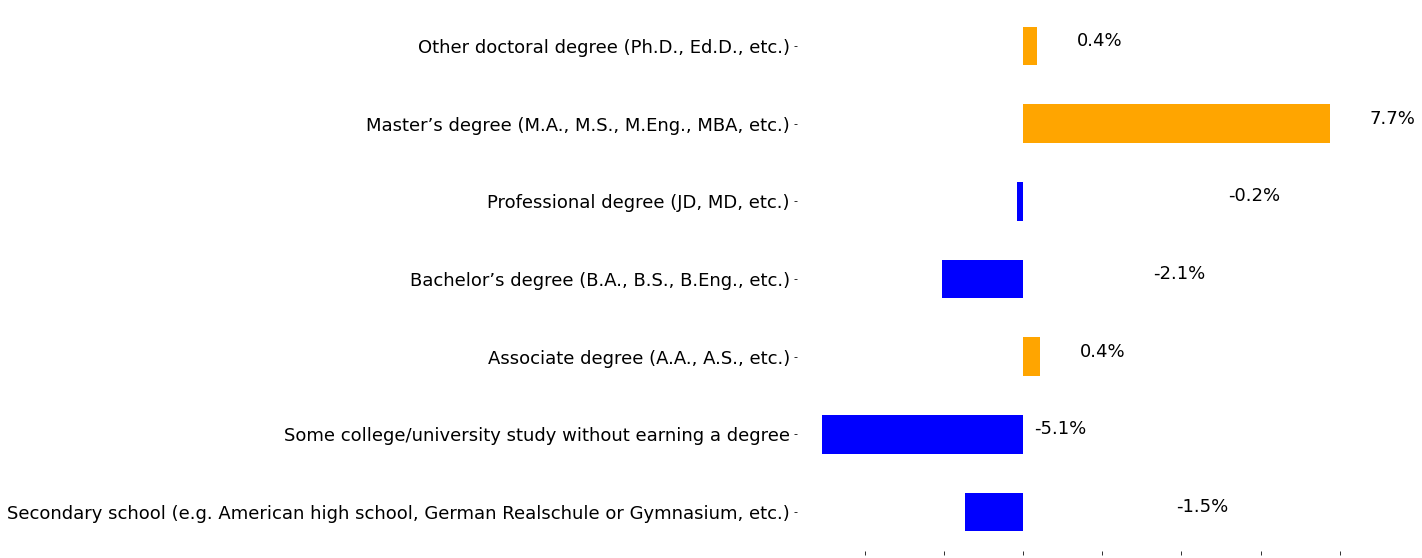

In [44]:
colors = tuple(np.where(df_education_level_w_m["Difference"]>0, 'orange', 'blue'))
ax = df_education_level_w_m.plot(kind = 'barh', x='Education Level', y='Difference', figsize = (10, 10), color = colors);

ax.get_legend().remove()
plt.ylabel("")
plt.xlabel("")
ylabels = ax.get_yticklabels()
show_values_on_bars(ax, "h", 1.0)
sns.despine(left=True, bottom=True, right=True)
ax.set_yticklabels(ylabels, fontsize=18)
ax.set(xticklabels=[])  
plt.show()

In [45]:
df_job_satisfaction = create_percentage(df_new, 'JobSat', 'Job Satisfaction', True)

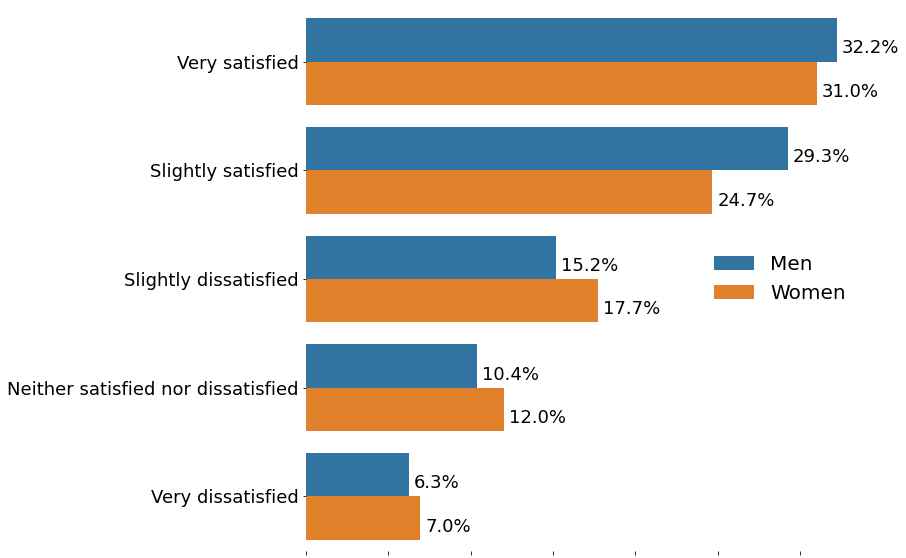

In [46]:
plot("Job Satisfaction", df_job_satisfaction)

In [117]:
table = create_frequency(df_new, 'JobSat', 'Job Satisfaction')
table.head()

,0,1,2,3,4
Job Satisfaction,Very satisfied,Slightly satisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Very dissatisfied
Women,49,39,28,19,11
Men,840,762,395,271,163


In [47]:
49+39

88

In [51]:
840+762

1602

In [55]:
28+11

39

In [56]:
395+163

558

In [59]:
table_job_sat = [[88, 39, 19],[1602, 558, 271]]

In [60]:
alpha = 0.05
pvalue = chi2_contingency(table_job_sat)[1]
if pvalue <= alpha:
    print("Dependent (reject HO)")
else:
    print("Independent (HO Holds)")
print(pvalue)

Independent (HO Holds)
0.3808698115707978


We have grouped the answers to Satisfied and not Satisfied and the result was that although from the percentages it
looks like the Men developers are more satisfied from their 

In [80]:
df_fac =df_new['JobFactors'].str.split(';')
df_fac_long = df_new.assign(method=df_fac).explode('method')
df_fac_long.head()
df_job_factors = create_percentage(df_fac_long, 'method', 'Job Factors', True)

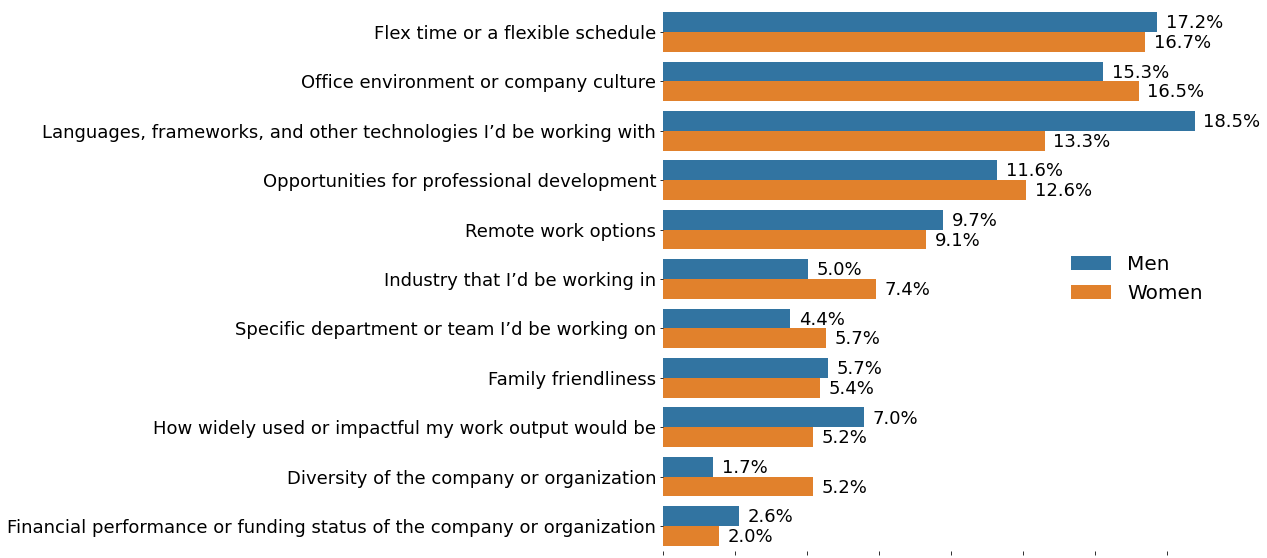

In [68]:
plot("Job Factors", df_job_factors)

In [81]:
table = create_frequency(df_fac_long, 'method', 'Job Factors')
table.head()

,0,1,2,3,4,5,6,7,8,9,10
Job Factors,Flex time or a flexible schedule,Office environment or company culture,"Languages, frameworks, and other technologies ...",Opportunities for professional development,Remote work options,Industry that I’d be working in,Specific department or team I’d be working on,Family friendliness,How widely used or impactful my work output wo...,Diversity of the company or organization,Financial performance or funding status of the...
Women,77,76,61,58,42,34,26,25,24,24,9
Men,1296,1154,1394,877,735,379,333,432,527,132,198


In [86]:
table_job_factors = [[76 , 61 ],[1154,  1394]]

In [87]:
alpha = 0.05
pvalue = chi2_contingency(table_job_factors)[1]
if pvalue <= alpha:
    print("Dependent (reject HO)")
else:
    print("Independent (HO Holds)")
print(pvalue)

Dependent (reject HO)
0.024923415137913532


In [332]:
df_overtime = create_percentage(df_new, 'NEWOvertime', 'Overtime', True)

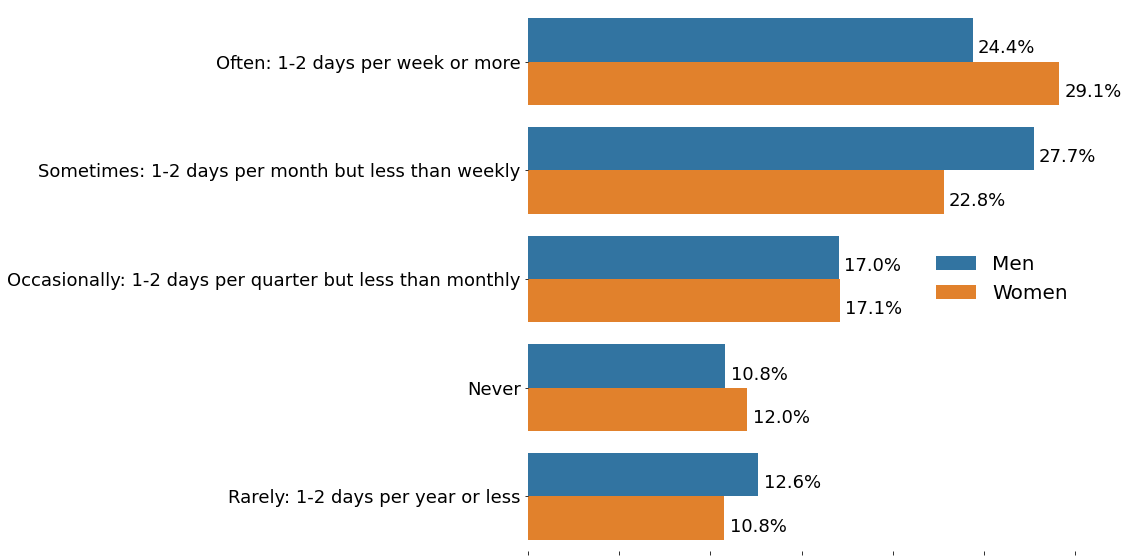

In [333]:
plot("Overtime", df_overtime)

In [74]:
table = create_frequency(df_new, 'NEWOvertime', 'Overtime')
table.head()

,0,1,2,3,4
Overtime,Often: 1-2 days per week or more,Sometimes: 1-2 days per month but less than we...,Occasionally: 1-2 days per quarter but less th...,Never,Rarely: 1-2 days per year or less
Women,46,36,27,19,17
Men,635,722,444,282,329


In [ ]:
We compare whether 

In [76]:
table_overtime = [[46, 36],[635, 722]]


In [77]:
alpha = 0.05
pvalue = chi2_contingency(table_overtime)[1]
if pvalue <= alpha:
    print("Dependent (reject HO)")
else:
    print("Independent (HO Holds)")
print(pvalue)

Independent (HO Holds)
0.12735145870392267
